[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/muhammadanas0716/PyCon-2024-CODE/blob/main/Credit_Card_Fraud_Detection.ipynb)



## Introduction
Welcome to our workshop on Credit Card Fraud Detection. Here, we tackle a significant challenge: detecting fraud in highly imbalanced datasets. Our focus? The Synthetic Minority Over-sampling Technique (***SMOTE***) to balance the scales and boost our model's detection capabilities.

## Data Snapshot
1. **Source**: European cardholders' transactions from September 2013.
2. **Volume**: 284,807 transactions, with 492 frauds (0.172%). Data provided to you is shortened.
3. **Content**: Variables are PCA-transformed for confidentiality, except for 'Time' and 'Amount'.

## Library Imports

In this section, we import all necessary libraries required for our data analysis and machine learning tasks.

- **NumPy** (`numpy`): A fundamental package for scientific computing with Python. It's used for working with arrays and matrices, along with a collection of mathematical functions to operate on these arrays.
- **Pandas** (`pandas`): Provides high-performance, easy-to-use data structures, and data analysis tools. It's particularly suited for data manipulation and analysis.
- **Matplotlib** (`matplotlib.pyplot`): A plotting library for creating static, interactive, and animated visualizations in Python.
- **Seaborn** (`seaborn`): Based on matplotlib, seaborn helps in creating more attractive and informative statistical graphics.


- **train_test_split** (`sklearn.model_selection`): Splits arrays or matrices into random train and test subsets. It's vital for evaluating the performance of your machine learning model.

## Modeling Libraries

- **LogisticRegression**, **RandomForestClassifier**, **KNeighborsClassifier**, **DecisionTreeClassifier**, **GaussianNB** (`sklearn`): These are various machine learning models for classification tasks, each with its own strengths and use cases.


## Validation/Testing Libraries

- **accuracy_score**, **f1_score**, **precision_score**, **recall_score** (`sklearn.metrics`): These functions are used for evaluating the performance of the machine learning models. They provide different metrics to understand the accuracy, precision, recall, and other important metrics of the models.

## SMOTE  for Imbalanced Datasets

- **SMOTE** (`imblearn.over_sampling`): This is the over-sampling technique used in this workshop to handle imbalanced datasets by creating synthetic samples of the minority class.

By importing these libraries and modules, we equip ourselves with a comprehensive toolkit for data preprocessing, model building, and evaluation, ensuring we're ready to tackle a wide range of data science challenges.


In [2]:
# Importing Libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Pre-Processing Libs
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split


# Modelling Libs
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

# Validating/Testing libs
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

# SMOTE & ADASYN
from imblearn.over_sampling import SMOTE

print("Libraries Imported")

Libraries Imported


## Load the dataset

Here we first use a utility to fetch and download our data called **wget**, and once it's downloaded to our google colab workspace, we unzip it.

In [6]:
!wget "https://github.com/muhammadanas0716/PyCon-2024-CODE/raw/main/credit.csv.zip" -O credit.csv.zip
!unzip credit.csv.zip

--2024-03-09 11:09:12--  https://github.com/muhammadanas0716/PyCon-2024-CODE/raw/main/credit.csv.zip
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/muhammadanas0716/PyCon-2024-CODE/main/credit.csv.zip [following]
--2024-03-09 11:09:12--  https://raw.githubusercontent.com/muhammadanas0716/PyCon-2024-CODE/main/credit.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13933781 (13M) [application/zip]
Saving to: ‘credit.csv.zip’

credit.csv.zip      100%[===================>]  13.29M  --.-KB/s    in 0.06s   

2024-03-09 11:09:13 (207 MB/s) - ‘credit.csv.zip’ saved [13933781/13933781]

Archive:

👉 Below we are using pandas `read_csv` method to read the CSV file we just unzipped above.

👉 We are also looking at the first 5 rows of our dataset.



In [7]:
# Read the dataset using the compression zip
credit_df = pd.read_csv("credit.csv")

credit_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,65718.0,1.386218,-1.259426,0.173934,-1.733565,-0.910477,0.575003,-1.164785,0.134258,-2.019379,...,-0.324109,-0.680021,-0.006464,-1.187995,0.182624,-0.333351,0.047115,0.015756,71.40,0
1,164378.0,-0.821220,1.435110,-2.108839,-0.824737,2.397360,-1.056848,1.213959,0.227692,-1.213263,...,0.130381,0.209044,-0.446472,-0.126485,0.197851,0.533995,-0.036036,0.076004,0.76,0
2,78018.0,-0.938641,1.960028,0.702690,2.993611,-0.504392,0.347760,-0.362805,0.945976,-1.022375,...,0.012312,0.268990,-0.070404,-0.067556,-0.041936,0.294256,0.233303,0.078932,2.40,0
3,121432.0,-0.670748,0.823190,-0.420778,0.211461,0.391492,-1.023996,0.448848,0.369667,-0.603047,...,0.447384,1.039909,-0.173176,-0.071917,-0.317259,-0.021914,0.067688,0.089415,41.29,0
4,34871.0,1.399467,-1.845187,0.990446,-1.182374,-1.764100,1.414648,-2.119106,0.502593,-0.039025,...,-0.279372,-0.088919,-0.170666,-1.338337,0.420714,0.073320,0.110162,0.018209,44.00,0


1. **Time**: The number of seconds elapsed between this transaction and the first transaction in the dataset.

2. **V1 to V28**: These are principal components obtained with PCA (Principal Component Analysis), which is a technique used to anonymize sensitive information. Unfortunately, without more context, the specific meaning of each component cannot be determined, but they are likely representative of aspects of the transaction like the amount, location, type of merchant, etc.

3. **Amount**: The transaction amount.

4. **Class**: The response variable indicating fraud; 0 means the transaction is not fraudulent, and 1 means it is fraudulent.

In [8]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56961 entries, 0 to 56960
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    56961 non-null  float64
 1   V1      56961 non-null  float64
 2   V2      56961 non-null  float64
 3   V3      56961 non-null  float64
 4   V4      56961 non-null  float64
 5   V5      56961 non-null  float64
 6   V6      56961 non-null  float64
 7   V7      56961 non-null  float64
 8   V8      56961 non-null  float64
 9   V9      56961 non-null  float64
 10  V10     56961 non-null  float64
 11  V11     56961 non-null  float64
 12  V12     56961 non-null  float64
 13  V13     56961 non-null  float64
 14  V14     56961 non-null  float64
 15  V15     56961 non-null  float64
 16  V16     56961 non-null  float64
 17  V17     56961 non-null  float64
 18  V18     56961 non-null  float64
 19  V19     56961 non-null  float64
 20  V20     56961 non-null  float64
 21  V21     56961 non-null  float64
 22

Approx. **57,000** rows, all **non-null**.

The actual dataset had about 280,000 rows and I have reduced it by 80% as dealing with such a large dataset is a bit difficult. It took a lot of time to run the ML algorithms.

But for the sole purpose of learning; this is more than enough!

In [9]:
credit_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,...,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000,56961.000000
mean,94918.716613,-0.001469,-0.004355,0.003374,0.007206,0.011643,0.002200,-0.005491,0.002214,0.008615,...,-0.001872,-0.000416,0.000442,0.000225,-0.004446,0.001631,0.002622,-0.000433,87.679258,0.001720
std,47432.965100,1.959524,1.653071,1.524267,1.414154,1.440693,1.364154,1.299156,1.199411,1.098673,...,0.733531,0.724968,0.628519,0.607210,0.519190,0.483251,0.413366,0.304614,252.308601,0.041443
min,0.000000,-46.855047,-48.060856,-48.325589,-5.519697,-113.743307,-20.869626,-31.197329,-50.420090,-9.462573,...,-22.889347,-8.887017,-30.269720,-2.836627,-6.429334,-1.726928,-9.543518,-15.430084,0.000000,0.000000
25%,54388.000000,-0.919592,-0.600673,-0.886812,-0.834604,-0.688179,-0.767143,-0.555410,-0.204594,-0.636880,...,-0.228390,-0.550324,-0.162017,-0.354543,-0.319205,-0.327549,-0.070295,-0.052511,5.800000,0.000000
50%,84751.000000,0.015091,0.068153,0.184636,-0.018836,-0.050300,-0.273007,0.039653,0.025064,-0.044580,...,-0.028071,0.006122,-0.009185,0.041769,0.011705,-0.047499,0.001923,0.011499,21.990000,0.000000
75%,139317.000000,1.314205,0.805345,1.029850,0.746895,0.622898,0.400952,0.572633,0.328263,0.605906,...,0.184720,0.527349,0.148917,0.440975,0.343409,0.243361,0.093532,0.078726,76.660000,0.000000
max,172792.000000,2.420346,16.497472,4.101716,15.304184,29.162172,73.301626,120.589494,19.587773,10.370658,...,27.202839,7.248763,17.751731,4.584549,5.852484,3.517346,31.612198,15.870474,25691.160000,1.000000


In [10]:
# Descriptive statistics for the entire dataset
descriptive_stats = credit_df.describe()

1. The dataset consists of 56,961 transactions.

2. Features V1 through V28, which are principal components, have varying means close to 0 and standard deviations.

3. The Amount feature has a mean transaction value of approximately 87.68 units with a wide range of transaction values (minimum of 0 to a maximum of 25,691.16 units), indicating significant variability in transaction amounts.

In [11]:
# Percentage of fraudulent transactions
fraud_percentage = credit_df['Class'].value_counts(normalize=True) * 100
pd.DataFrame(fraud_percentage)

,Class
0,99.827952
1,0.172048


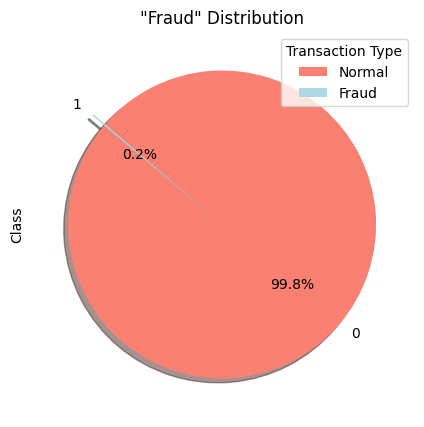

In [12]:
# Percentage visualised
plt.figure(figsize=(7, 5))
credit_df['Class'].value_counts().plot(kind="pie", explode=[0, 0.1], shadow=True, startangle=140, autopct='%1.1f%%', colors=["salmon", "lightblue"])
plt.legend(labels=['Normal', 'Fraud'], title="Transaction Type")
plt.title('"Fraud" Distribution')
plt.show()

# Next STEP

## Handling Imbalanced Data: SMOTE

### Splitting the Dataset
The dataset is divided into features (`X`) and the target variable (`y`):
- `X = credit_df.drop('Class', axis=1)`: Drops the target column 'Class', retaining only the features.
- `y = credit_df['Class']`: Isolates the target variable 'Class'.

### Applying SMOTE
Synthetic Minority Over-sampling Technique (SMOTE) is utilized to address class imbalance by synthetically generating new instances of the minority class.


In [13]:
# Split the features and target variable
X = credit_df.drop('Class', axis=1)
y = credit_df['Class']

# Apply SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Check the balance of the target variable after applying SMOTE and ADASYN
balance_smote = y_smote.value_counts(normalize=True) * 100

balance_smote

0    50.0
1    50.0
Name: Class, dtype: float64

👉 The expression `y_smote.value_counts(normalize=True) * 100` calculates the percentage of each class in your data. normalize=True converts the count of each class into a proportion (fraction of the total), and multiplying by 100 turns these proportions into percentages.

Bascially, showing percentages of your data.

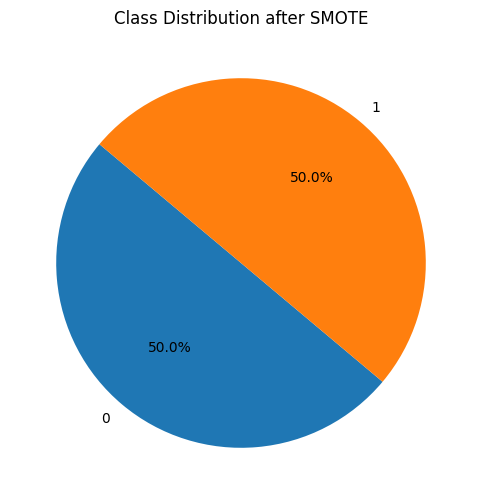

In [14]:
# Calculate the balance of the target variable
balance_smote = y_smote.value_counts(normalize=True) * 100

# Plotting the pie chart for the balanced dataset
plt.figure(figsize=(8, 6))
plt.pie(balance_smote, labels=balance_smote.index, autopct='%1.1f%%', startangle=140)
plt.title('Class Distribution after SMOTE')
plt.show()

In [15]:
# Splitting
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)
print(f"""Data Splitted. Here are the Stats:

Rows in X_train: {X_train.shape[0]}
Rows in y_train: {y_train.shape[0]}

Rows in X_test: {X_test.shape[0]}
Rows in y_test: {y_test.shape[0]}

Columns in X_train & X_test => 3
Columns in y_train & y_test is ONLY 1 => the TARGET column (i.e Class)""")

Data Splitted. Here are the Stats:

Rows in X_train: 79608
Rows in y_train: 79608

Rows in X_test: 34118
Rows in y_test: 34118

Columns in X_train & X_test => 3
Columns in y_train & y_test is ONLY 1 => the TARGET column (i.e Class)


In [16]:
# Naive Bayes
classifier = GaussianNB()
classifier.fit(X_train , y_train)
classifier_score = classifier.score(X_test , y_test)
print(classifier_score)

0.8868632393457999


In [17]:
# Decision Tree
dt =DecisionTreeClassifier(max_features=8 , max_depth=6)
model = dt.fit(X_train , y_train)
dt_score = dt.score(X_test , y_test)
print(dt_score)

0.9850518787736678


In [18]:
# Random Forest Classifier
Rclf = RandomForestClassifier(n_estimators=20, max_features=8, max_depth=2, n_jobs=-1)
Rclf.fit(X_train, y_train)
Rclf_score = Rclf.score(X_test, y_test)
print(Rclf_score)

0.9629814174336128


In [19]:
# Logistic Regression
lr = LogisticRegression(C = 100, max_iter=1000)
lr.fit(X_train , y_train)
lr_score = lr.score(X_test , y_test)
print(lr_score)

0.9780174687848057


In [20]:
# K-Nearest
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn_score = knn.score(X_test, y_test)
print(knn_score)

0.9077906090626648


## Model Comparison:

### Setup
👉 Names & Models: Initializes names with model names and models with the actual model instances (classifier, dt, Rclf, lr, knn, xgb).

👉 Results Dictionary: An empty dictionary results is set up to hold prediction results.

### Processing
👉 The loop iterates over each model, using its class name as a key and its predictions on X_test as the value in the results dictionary.

### Key Line Explained
👉 `results[str(model).split("(")[0]] = [model.predict(X_test)]`: Extracts the model's class name, makes predictions on X_test, and stores the results.

In [26]:
model_comparison = {}
names = ["Decision Tree", "Naive", "Random Forest", "KNN", "Logistic Regression"]
models = [classifier, dt, Rclf, lr, knn]
results = {}

# Make Predictions
for model in models:
    results[str(model).split("(")[0]] = [model.predict(X_test)]

## Prediction Evaluation
After making predictions with our models, we assess their performance using different metrics:

1. **Precision**: It's about being right when you say you're right. For example, if a model predicts 10 emails as spam and 9 actually are, the precision is 90%. It's crucial when the cost of a false positive is high.

2. **Recall**: It's about catching what you need to catch. If out of 100 actual spams, the model catches 80, the recall is 80%. This is vital when missing a positive case has serious consequences.

3. **Accuracy**: This measures overall correctness. If a model gets 90 out of 100 predictions right, its accuracy is 90%. However, it can be misleading if the class distribution is uneven.

4. **F-1 Score**: This balances precision and recall. It's the harmonic mean of the two, useful when you equally value precision and recall or deal with uneven class distributions. A perfect F1 score is 1, indicating perfect precision and recall.

In [28]:
# Find the scores of the metrics
for model, preds in results.items():
    model_comparison[model] = [
                            round(accuracy_score(y_test, pd.DataFrame(preds).T), 2),
                            round(f1_score(y_test, pd.DataFrame(preds).T), 2),
                            round(precision_score(y_test, pd.DataFrame(preds).T), 2),
                            round(recall_score(y_test, pd.DataFrame(preds).T), 2),
    ]

In [29]:
results_df = pd.DataFrame(model_comparison, index=["Accuracy", "F-1 Score", "Precision Score", "Recall Score"])
results_df.style.format("{:.2%}").background_gradient(cmap='Blues')

,GaussianNB,DecisionTreeClassifier,RandomForestClassifier,LogisticRegression,KNeighborsClassifier
Accuracy,89.00%,99.00%,96.00%,98.00%,91.00%
F-1 Score,87.00%,98.00%,96.00%,98.00%,91.00%
Precision Score,99.00%,99.00%,99.00%,98.00%,89.00%
Recall Score,78.00%,98.00%,93.00%,98.00%,92.00%



# Overall Analysis
👉 The tree-based models (Decision Tree, Random Forest, XGBoost) and KNN tend to perform better than GaussianNB and Logistic Regression in this dataset.

👉 KNN seem to have the best overall performance with almost perfect or perfect scores across all metrics. However, these results could be indicative of overfitting, especially if such perfection is not consistent with cross-validation or other datasets.

👉 GaussianNB shows relatively lower performance but still acceptable, especially given its simplicity and the fact that it can perform quite well in cases with assumption of feature independence.

👉 Logistic Regression, while not as performant as the tree-based models or KNN, shows very high precision, suggesting it's quite reliable when predicting positive classes.